### Exercise 1: Scikit-learn estimator

##### 1. Fit a LinearRegression from Scikit-learn with X the features and y the target and predict for x_pred = [[4]]

In [71]:
from sklearn import linear_model

X, y = [[1],[2.1],[3]], [[1],[2],[3]]
reg = linear_model.LinearRegression()
reg.fit(X, y)

x_pred = reg.predict([[4]])

##### 2. Print the coefficients (coefs_) and the intercept (intercept_), the score (score) of the regression of X and y.

In [72]:
print("coef:",reg.coef_,end="\n")
print("intercept:", reg.intercept_)
print("score:", reg.score(X,y))

coef: [[0.99667774]]
intercept: [-0.02657807]
score: 0.9966777408637874


### 2. Exercise 2: Linear regression in 1D

In [73]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_samples=100, # type: ignore
                         n_features=1,
                         n_informative=1,
                         noise=10,
                         coef=True,
                         random_state=0,
                         bias=100.0)
reg.fit(X, y)


LinearRegression()

#### 1. Plot the data using matplotlib. The plot should look like this:

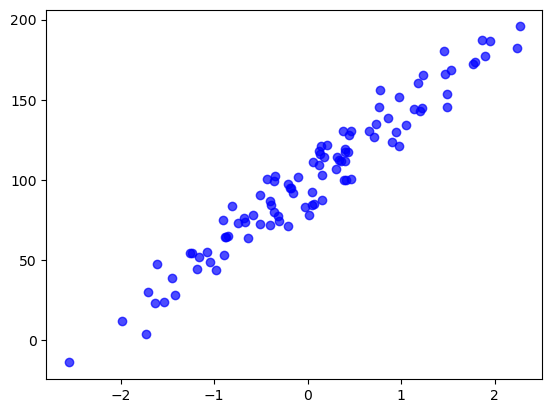

In [74]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(X,y,color='blue',alpha=0.7,label="Data points")
plt.show()

##### 2.Fit a LinearRegression from Scikit-learn on the generated data and give the equation of the fitted line. The expected output is: y = coef * x + intercept

In [75]:
linear_range = np.linspace(X.min(),X.max(),100).reshape(-1,1)
y_pred = reg.predict(linear_range)

##### 3. add the fitted line to the plot. The plot should look like this:

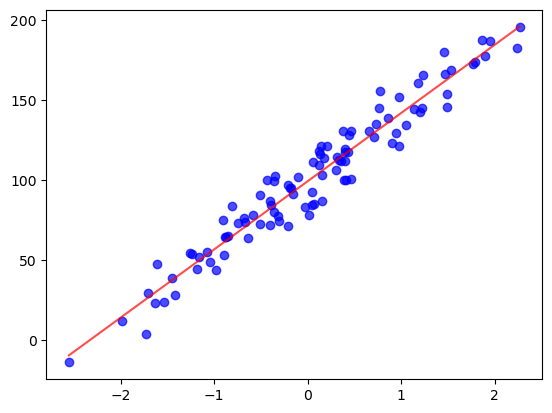

In [76]:
plt.scatter(X,y,color='blue',alpha=0.7,label="Data points")
plt.plot(linear_range,y_pred,color='red',alpha=0.7,label="Fitted line")

##### 4. Predict on X

In [77]:
x_pred = reg.predict(X)
x_pred

array([ 83.86186727, 140.80961751, 116.3333897 ,  64.52998689,
        61.34889539, 118.10301628,  57.5347917 , 117.44107847,
       108.06237908,  85.90762675,  77.41559422, 104.59473926,
        33.71198748,  82.06214357, 127.04267034, 149.42473193,
        91.51752418, 175.2986012 , 161.16612653,  69.99960224,
       140.89907346, 179.98753475,  80.51534101, 112.52858526,
       131.62081245, 132.3220142 , 182.32675414, 113.40682791,
        84.35800058, 164.51199505,  61.02154349,  74.51557524,
        54.49708817, 115.30288932,  99.63332307, 118.90933425,
       105.32487311,  82.00264639, 101.39970135,  45.79239366,
       144.12595004, 116.24029042,  26.46555473, 194.69140967,
       106.74761927,  90.44208985, 151.62010608,  62.78474435,
       174.36872416, 116.6852924 ,  60.51727878,  38.66546269,
       119.03208606, 137.57852984, 147.74642622, 116.31837583,
       115.67538221,  25.61263714, 161.80905184,  91.20814913,
        62.07293978, 112.07699813, 150.43056232,  14.76

##### 5. Create a function that computes the Mean Squared Error (MSE) and compute the MSE on the data set. The MSE is frequently used as well as other regression metrics that will be studied later this week.

In [78]:
def compute_mse(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

compute_mse(y,x_pred)

114.17148616819486

* Change the noise parameter of make_regression to 50

In [79]:
X, y, coef = make_regression(n_samples=100, # type: ignore
                         n_features=1,
                         n_informative=1,
                         noise=50,
                         coef=True,
                         random_state=0,
                         bias=100.0)

##### 6. Repeat question 2, 4 and compute the MSE on the new data.

In [80]:
reg.fit(X,y)    
x_pred = reg.predict(X)
compute_mse(y,x_pred)

2854.2871542048706

### Exercise 3: Train test split

##### 1. Split the data using train_test_split with shuffle=False. The test set represents 20% of the total size of the data set. Print X_train, y_train, X_test, y_test.

In [85]:
from sklearn.model_selection import train_test_split

X = np.arange(1,21).reshape(10,-1)
y = np.arange(1,11)


X_train, X_test,y_train,  y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
print(f"""
X_train:
{X_train}

X_test:
{X_test}

y_train:
{y_train}

y_test:
{y_test}
""")


X_train:
[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]
 [13 14]
 [15 16]]

X_test:
[[17 18]
 [19 20]]

y_train:
[1 2 3 4 5 6 7 8]

y_test:
[ 9 10]



### Exercise 4: Forecast diabetes progression

In [90]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes(as_frame=True)
X, y = diabetes.data, diabetes.target

##### 1. Using train_test_split, split the data set in a train set, and test set (20%). Use random_state=43 for results reproducibility.

In [96]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=43,test_size=0.2)
print(y_train.values[:10])
print(y_test.values[:10])

[202.  55. 202.  42. 214. 173. 118.  90. 129. 151.]
[ 71.  72. 235. 277. 109.  61. 109.  78.  66. 192.]


##### 2. Fit the Linear Regression on all the variables. Give the coefficients and the intercept of the Linear Regression. What is the equation ?

In [99]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

coef_with_names = list(zip(reg.feature_names_in_, reg.coef_))

coef_with_names.append(('intercept', reg.intercept_))
coef_with_names

[('age', -60.399848093335436),
 ('sex', -226.083590442692),
 ('bmi', 529.3849571887336),
 ('bp', 259.9619941214204),
 ('s1', -859.093009334805),
 ('s2', 504.6869733896214),
 ('s3', 157.41085788032888),
 ('s4', 226.2931343552122),
 ('s5', 840.7840406049232),
 ('s6', 34.71226555571696),
 ('intercept', 152.0532454782767)]

##### 3. Predict on the test set. Predicting on the test set is like having new patients for who, as a physician, need to forecast the disease progression in one year given the 10 baseline variables.

In [120]:
pred = reg.predict(X_test)
pred1 =  reg.predict(X_train)

##### 4. Compute the MSE on the train set and test set. Later this week we will learn about the R2 which will help us to evaluate the performance of this fitted Linear Regression. The MSE returns an arbitrary value depending on the range of error.

In [121]:
train_mse = compute_mse(y_train,pred1)
test_mse = compute_mse(y_test,pred)

print(f"train mse: {train_mse}\ntest mse: {test_mse}")

train mse: 2888.324598377127
test mse: 2858.2915057597884


### Exercise 5: Gradient Descent (Optional)

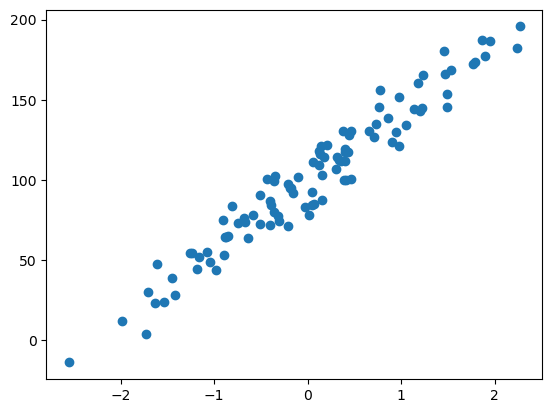

In [124]:
X, y, coef = make_regression(n_samples=100,
                         n_features=1,
                         n_informative=1,
                         noise=10,
                         coef=True,
                         random_state=0,
                         bias=100.0)

plt.scatter(X,y)
plt.show()